<h1> Sentiment Analysis of  Kaggle-IMDB movie reviews dataset using Deep Learning</h1>

<h2>Importing Modules 

In [1]:
import re
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
tf.__version__

'2.5.0'

<h4>Dataset Link :https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/code</h4>

In [3]:
df = pd.read_csv('IMDB Dataset.csv')

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.shape   #DataFrame Shape

(50000, 2)

In [6]:
df.isnull().values.any()    #To check for any null values,if present

False

In [7]:
#Labelling Dependent Feature
df['code'] = df['sentiment'].copy()
for i in range(len(df)):
    if df['sentiment'][i] == 'positive':
        df['code'][i] = 1
    else:
        df['code'][i] = 0
        

<h2> Code   :   Sentiment </h3>
<h3> 1      :   Positive  </h3>
<h3> 0      :  Negative  </h3>

In [8]:
df.head()

,review,sentiment,code
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [9]:
X = df['review']
y= df['code']

In [10]:
#changing datatype to int64
y = y.apply(pd.to_numeric)  

In [11]:
X

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [12]:
y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: code, Length: 50000, dtype: int64

<h2> Text Cleaning and Preprocessing </h2>

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [14]:
corpus = []   

In [15]:
#text preprocessing
#removing special characters
#stemming using porter stemmer
for i in range(len(X)):
    text = re.sub('[^a-zA-Z]', ' ',X[i])
    text = text.lower()
    text = text.split()
    text = [ps.stem(word) for word in text if not word in stopwords.words('english')]
    text = ' '.join(text)
    corpus.append(text)

In [16]:
#corpus

In [17]:
#Importing Modules 
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from keras.layers import Dropout


<h2> Embedding Matrix

In [18]:
voc_size = 5000
onehot_repr = [one_hot(words,voc_size) for words in corpus]
#onehot_repr

In [19]:
#Embedding Layer
sent_length = 150
embedded_docs= pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[3110 4371  893 ... 1313 3694 3294]
 [   0    0    0 ... 3444 1407 2698]
 [   0    0    0 ... 4546 2583 2500]
 ...
 [   0    0    0 ... 2066 1566 4252]
 [   0    0    0 ... 2093 2699 1316]
 [   0    0    0 ... 3443 1295 4893]]


In [20]:
embedded_docs[0]

array([3110, 4371,  893, 4933, 1369, 4546, 4260, 2080, 4791, 3980, 2466,
       2080, 2679, 3849, 1069,  496, 2556, 4371, 3501, 3189, 1259, 1369,
       4599, 4599, 4947, 2872, 3582, 3528,  914, 2722, 3285, 3096, 4147,
       2788,  945, 2720,  464, 4476, 1905, 1197, 3062, 4341, 3972, 4082,
       3602, 4414,  400, 2372, 4911,  464, 4454, 4518, 2900, 3054, 2072,
       1332, 4252,  606, 2880,  681,  748, 4994, 4315, 2811, 3886, 1744,
        748, 2865, 2115, 4599, 4599,  475, 2926, 4415, 2460, 2080, 3763,
       2879,  306, 2080, 2890, 1593, 3789, 2006, 4642, 4298, 3110, 1593,
       1893, 1593, 4272, 2872, 3386,  323, 4343, 1731, 4337, 1000, 3070,
       2011, 4660, 2926, 4740, 4211, 3888,  291, 2872, 3862, 1948,  400,
       3347, 4463, 4371, 4371,  455,  362,  567, 4160,  433, 4206, 2861,
        878, 1978, 2115, 1407,  429,  988,  102, 4206, 3020, 1197, 3474,
       3763,  817, 3590, 2863, 1197, 3248, 4211, 2872, 1573, 1908, 3553,
       3115, 2088, 2532, 1978, 1313, 3694, 3294])

In [21]:
len(embedded_docs),y.shape

(50000, (50000,))

<h3> LSTM model for sentiment prediction

<h4>Initialising a sequential model</h4>
<h4>setting dimension of embedding matrix to 100</h4>
<h4>initiliasing a sequential model</h4>
<h4>adding embedding layer</h4>
<h4>adding dropout layers to avoid overfitting</h4>

In [22]:
#Model
embedding_dim = 100   
model = Sequential() 
model.add(Embedding(voc_size,embedding_dim,input_length=sent_length))   
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.add(Dropout(0.3))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 150, 100)          500000    
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 150, 100)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 1)                 0         
Total params: 580,501
Trainable params: 580,501
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
X_final = np.array(embedded_docs)
y_final=np.array(y)

In [24]:
X_final.shape,y_final.shape

((50000, 150), (50000,))

In [25]:
X_final

array([[3110, 4371,  893, ..., 1313, 3694, 3294],
       [   0,    0,    0, ..., 3444, 1407, 2698],
       [   0,    0,    0, ..., 4546, 2583, 2500],
       ...,
       [   0,    0,    0, ..., 2066, 1566, 4252],
       [   0,    0,    0, ..., 2093, 2699, 1316],
       [   0,    0,    0, ..., 3443, 1295, 4893]])

In [26]:
y_final

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

<h3> Splitting test and train data

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

<h3>Model Training</h3>
<h4> Setting epoch = 25 and batch-size as 200

In [28]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=25,batch_size=200)

Epoch 1/25
168/168 [==============================] - 44s 256ms/step - loss: 2.6808 - accuracy: 0.6776 - val_loss: 0.4802 - val_accuracy: 0.7930
Epoch 2/25
168/168 [==============================] - 42s 252ms/step - loss: 2.5323 - accuracy: 0.7554 - val_loss: 0.5699 - val_accuracy: 0.7277
Epoch 3/25
168/168 [==============================] - 42s 252ms/step - loss: 2.5562 - accuracy: 0.7592 - val_loss: 0.4338 - val_accuracy: 0.8475
Epoch 4/25
168/168 [==============================] - 42s 251ms/step - loss: 2.4996 - accuracy: 0.7719 - val_loss: 0.4663 - val_accuracy: 0.8315
Epoch 5/25
168/168 [==============================] - 42s 252ms/step - loss: 2.5147 - accuracy: 0.7748 - val_loss: 0.4573 - val_accuracy: 0.8377
Epoch 6/25
168/168 [==============================] - 42s 252ms/step - loss: 2.5203 - accuracy: 0.7728 - val_loss: 0.4506 - val_accuracy: 0.8336
Epoch 7/25
168/168 [==============================] - 42s 253ms/step - loss: 2.4949 - accuracy: 0.7816 - val_loss: 0.4401 - val_ac

<h3> Predicting for test data

In [29]:
y_pred=model.predict_classes(X_test)

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


<h3> Code   :   Sentiment </h3>
<h3> 1      :   Positive  </h3>
<h3> 0      :  Negative  </h3>

In [30]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])

<h3> Accuracy Score

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7871515151515152

<h2> An accuracy of 83.68% is achieved

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

<h2> Confusion Matrix

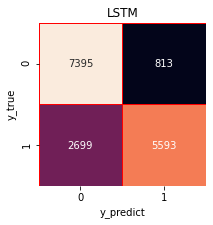

In [33]:
cm = metrics.confusion_matrix(y_test, y_pred)
f,ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm,annot=True,linewidths=0.5,cbar=False,linecolor="red",fmt='.0f',ax=ax)
plt.xlabel("y_predict")
plt.ylabel("y_true")
ax.set(title=str('LSTM'))
plt.show()



<h3>accuracy = (7496 + 6312)/(7496+712+1980+6312) = 0.8368